In [22]:
#!/usr/bin/env pyhon
from __future__ import print_function
from itertools import count

In [23]:
import numpy as np
import torch
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [24]:
random_state=5000
torch.manual_seed(random_state)
PLOY_DEGREE=4
W_target=torch.randn(PLOY_DEGREE,1)*5
b_target=torch.randn(1)*5

In [25]:
def make_features(x):
    x=x.unsqueeze(1)
    return torch.cat([x**i for i in range(1,PLOY_DEGREE+1)],1)

In [26]:
def f(x):
    return x.mm(W_target) + b_target[0]

In [27]:
def poly_desc(W,b):
    result='y='
    for i,w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W)-i)
        result += '{:+.2f}'.format(b[0])
        return result
        

In [28]:
def get_batch(batch_size=32):
    random = torch.from_numpy(np.sort(torch.randn(batch_size)))
    x=make_features(random)
    y=f(x)
    return Variable(x),Variable(y)

In [29]:
fc=torch.nn.Linear(W_target.size(0),1)

<class 'torch.Tensor'>	


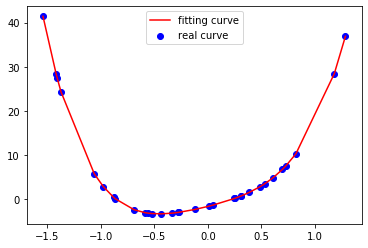

Loss: 0.000252 after 1 batches
==> Learned function:	y=+6.10 x^4 -1.65
==> Actual function:	y=+6.13 x^4 -1.62


In [38]:
for batch_idx in count(1):
    batch_x, batch_y = get_batch()
    fc.zero_grad()
    output=F.smooth_l1_loss(fc(batch_x),batch_y)
    print(str(type(output))+'\t')
    #loss=output.data[0]
    loss=output.item()
    output.backward()
    for param in fc.parameters():
        param.data.add_(-0.1*param.grad.data)
    if loss< 1e-3:
        plt.cla()
        plt.scatter(batch_x.data.numpy()[:,0], batch_y.data.numpy()[:,0], label='real curve', color = 'b')
        plt.plot(batch_x.data.numpy()[:,0], fc(batch_x).data.numpy()[:,0], label='fitting curve', color = 'r')
        plt.legend()
        plt.show()
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1), fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))